In [1]:
using CSV
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/output_HHS_US_2021-02-13_one_column.csv"))

,Column1,hospital_name,ccn,collection_week,fips_code,hospitalization_percentage,ICU_percentages,hospitalization_2021-01-19,target_date
,Int64,String,String?,Date…,Float64,Float64?,Float64?,Float64?,Date…
1,10,PRATTVILLE BAPTIST HOSPITAL,010108,2021-01-08,1001.0,1.0,0.130584,5.39817,2021-01-19
2,11,THOMAS HOSPITAL,010100,2021-01-08,1003.0,0.516628,0.265781,7.5387,2021-01-19
3,12,NORTH BALDWIN INFIRMARY,010129,2021-01-08,1003.0,0.165797,0.135714,2.41933,2021-01-19
4,13,SOUTH BALDWIN REGIONAL MEDICAL CENTER,010083,2021-01-08,1003.0,0.317575,0.292683,4.6341,2021-01-19
5,14,MEDICAL CENTER BARBOUR,010069,2021-01-08,1005.0,1.0,0.277778,1.34824,2021-01-19
6,15,BIBB MEDICAL CENTER,010058,2021-01-08,1007.0,0.791667,missing,1.33872,2021-01-19
7,16,ST VINCENTS BLOUNT,011305,2021-01-08,1009.0,0.958333,0.102041,3.82677,2021-01-19
8,17,BULLOCK COUNTY HOSPITAL,010110,2021-01-08,1011.0,0.0,missing,0.0,2021-01-19
9,18,REGIONAL MEDICAL CENTER OF CENTRAL ALABAMA,010150,2021-01-08,1013.0,0.958333,0.262295,1.08509,2021-01-19


In [4]:
mean(xs) = sum(xs) / length(xs);

In [5]:
isbad(x) = isnothing(x) || ismissing(x) || isinf(x) || isnan(x);
skipbad(xs) = filter(x -> !isbad(x), xs);

In [6]:
sum_vals(xs) = sum(skipbad(xs));
mean_vals(xs) = mean(skipbad(xs));

In [7]:
data_total = combine(groupby(data, :target_date), [
    "hospitalization_2021-01-19" => sum_vals => :admissions,
    :ICU_percentages => mean_vals => :icu_pct,
    :hospitalization_percentage => mean_vals => :hosp_pct,
])

,target_date,admissions,icu_pct,hosp_pct
,Date…,Float64,Float64,Float64
1,2021-01-19,14391.8,0.186916,0.424785
2,2021-01-20,14683.2,0.186916,0.424785
3,2021-01-21,14894.6,0.186916,0.424785
4,2021-01-22,14940.8,0.186916,0.424785
5,2021-01-23,14938.0,0.186916,0.424785
6,2021-01-24,14745.9,0.186916,0.424785
7,2021-01-25,14564.9,0.186916,0.424785
8,2021-01-26,14605.5,0.186916,0.424785
9,2021-01-27,14855.9,0.186916,0.424785


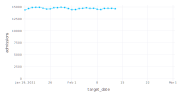

In [8]:
plot(
    data_total,
    x = :target_date,
    y = :admissions,
    Geom.point, Geom.line,
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:2500:15000),
) |> SVG(18cm, 10cm)